In [ ]:
import pandas as pd
"""
movies_url = "drive/MyDrive/MovieLens/movies.csv"
links_url = "drive/MyDrive/MovieLens/links.csv"
ratings_url = "drive/MyDrive/MovieLens/ratings.csv"
tags_url = "drive/MyDrive/MovieLens/tags.csv"
"""

movies_url = "./dadosMovieLens/movies.csv"
links_url = "./dadosMovieLens/links.csv"
ratings_url = "./dadosMovieLens/ratings.csv"
tags_url = "./dadosMovieLens/tags.csv"

movies = pd.read_csv(movies_url)
links = pd.read_csv(links_url)
ratings = pd.read_csv(ratings_url)
tags = pd.read_csv(tags_url)

Análises iniciais nos dados para conhecê-los:

In [ ]:
#Quantos filmes temos em mãos?

movies.shape
#9742 filmes

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
#Quantos usuários fizeram avaliações de filmes?
len(ratings["userId"].unique())
#610 usuários

610

In [ ]:
#Quantos filmes receberam ao menos uma avaliação?
len(ratings["movieId"].unique())
#Todos os 9724 filmes receberam avaliação

9724

In [ ]:
#Quantas tags diferentes foram cadastradas na base de dados?
len(tags["tag"].unique())


1589

##Filmes mais frequentemente avaliados

In [ ]:
#Filmes com maior número de avaliações
ratings["movieId"].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: movieId, Length: 9724, dtype: int64

Podemos ver que o filme que mais recebeu avaliações foi o filme cujo id é 356. Podemos pesquisar no dataframe de filmes quais seriam os títulos dos 5 filmes mais bem avaliados.

In [ ]:
filmes_mais_avaliados = ratings["movieId"].value_counts()[:5]

dados_filmes_mais_avaliados = movies.query("movieId in @filmes_mais_avaliados.index")
dados_filmes_mais_avaliados

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


Selecionando todas as avaliações dos 5 filmes mais avaliados:

In [ ]:
avaliacoes_filmes_mais_frequentes = ratings.query("movieId in @filmes_mais_avaliados.index")

Juntando os dados dos filmes mais bem avaliados com as suas avaliações para que seja possível recuperar os nomes dos filmes a partir de cada uma das avaliações.

In [ ]:
avaliacoes_filmes_mais_frequentes_merged = avaliacoes_filmes_mais_frequentes.merge(dados_filmes_mais_avaliados, on="movieId")
avaliacoes_filmes_mais_frequentes_merged

,userId,movieId,rating,timestamp,title,genres
0,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,4,296,1.0,945173350,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,5,296,5.0,847434748,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,6,296,2.0,845553110,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,8,296,4.0,839463422,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
1505,606,318,3.5,1171927228,"Shawshank Redemption, The (1994)",Crime|Drama
1506,607,318,5.0,963080679,"Shawshank Redemption, The (1994)",Crime|Drama
1507,608,318,4.5,1147210910,"Shawshank Redemption, The (1994)",Crime|Drama
1508,609,318,4.0,847220907,"Shawshank Redemption, The (1994)",Crime|Drama


Agora vejamos a série contendo os títulos e a quantidade de avaliações dos 5 filmes mais avaliados.

In [ ]:
avaliacoes_filmes_mais_frequentes_merged["title"].value_counts()

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64

A partir da série podemos plotar o grafico:

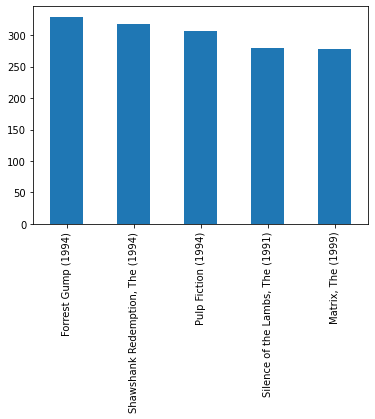

In [ ]:
avaliacoes_filmes_mais_frequentes_merged["title"].value_counts().plot.bar()

Qual a nota média de Forrest Gump?

In [ ]:
avaliacoes_forrest_gump = avaliacoes_filmes_mais_frequentes_merged.query("movieId == 356")
avaliacoes_forrest_gump["rating"].describe()
avaliacoes_forrest_gump["rating"].mean()

4.164133738601824